# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, silhouette_samples

# Data Loading

In [2]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
features = data.columns[1:]

In [6]:
data[features].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Dapat dilihat jika data memiliki outliers

In [7]:
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

## Missing Values

In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Menentukan Central Tendency yang cocok untuk mengisi missing values

In [9]:
data[data.CREDIT_LIMIT.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [10]:
data.CREDIT_LIMIT.describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

Karena pada kasus C15349 kolom purchases berisi 0 dan cash advances memiliki nilai maka kita cari yang sejenis

In [11]:
data_aux = data[(data.PURCHASES_TRX==0)&(data.CASH_ADVANCE_TRX>0)][['CASH_ADVANCE','CASH_ADVANCE_TRX','CREDIT_LIMIT']]
print(data_aux.describe())
data_aux.head()

       CASH_ADVANCE  CASH_ADVANCE_TRX  CREDIT_LIMIT
count   2040.000000       2040.000000   2039.000000
mean    1992.261348          6.302941   4033.137159
std     2471.855175          8.086244   3267.328465
min       18.042768          1.000000     50.000000
25%      380.582133          2.000000   1500.000000
50%     1206.719268          4.000000   3000.000000
75%     2706.003459          8.000000   6000.000000
max    26194.049540        123.000000  19000.000000


,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT
1,6442.945483,4,7000.0
14,346.811390,1,3000.0
16,2784.274703,3,3000.0
24,798.949863,4,6000.0
35,99.264367,1,1800.0


Karena tidak terlihat adanya hubungan maka kita dapat menggunakan median

In [12]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

In [13]:
data[data.MINIMUM_PAYMENTS.isna()].head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
56,C10058,3625.218146,1.000000,313.27,313.27,0.0,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.000000,NaN,0.0,12
63,C10065,7.152356,0.090909,840.00,840.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,NaN,0.0,12
93,C10098,1307.717841,1.000000,405.60,405.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,2400.0,0.000000,NaN,0.0,12
94,C10099,2329.485768,1.000000,213.34,213.34,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,2400.0,0.000000,NaN,0.0,12
97,C10102,3505.671311,1.000000,0.00,0.00,0.0,1713.984305,0.000000,0.000000,0.000000,0.500000,6,0,4000.0,0.000000,NaN,0.0,12


In [14]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

In [15]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Handling Outliers

### z_scr method

In [16]:
def detect_col_outliers(ls_data):
    mean = np.mean(ls_data)
    std = np.std(ls_data)
    
    return [i for i in ls_data if np.abs(i-mean) > 4*std]

In [17]:
features_outliers = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']
for name_col in features_outliers:
    rtdo = detect_col_outliers(data[name_col])
    print('-'*50)
    print(name_col)
    print('# values outlier: ', len(rtdo))
    print('{0:.2f}% of the total data'.format(100*len(rtdo)/data.shape[0]))

--------------------------------------------------
BALANCE
# values outlier:  70
0.78% of the total data
--------------------------------------------------
PURCHASES
# values outlier:  80
0.89% of the total data
--------------------------------------------------
ONEOFF_PURCHASES
# values outlier:  74
0.83% of the total data
--------------------------------------------------
INSTALLMENTS_PURCHASES
# values outlier:  79
0.88% of the total data
--------------------------------------------------
CASH_ADVANCE
# values outlier:  98
1.09% of the total data
--------------------------------------------------
CASH_ADVANCE_TRX
# values outlier:  80
0.89% of the total data
--------------------------------------------------
PURCHASES_TRX
# values outlier:  95
1.06% of the total data
--------------------------------------------------
CREDIT_LIMIT
# values outlier:  29
0.32% of the total data
--------------------------------------------------
PAYMENTS
# values outlier:  92
1.03% of the total data
---

## IQR Method

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

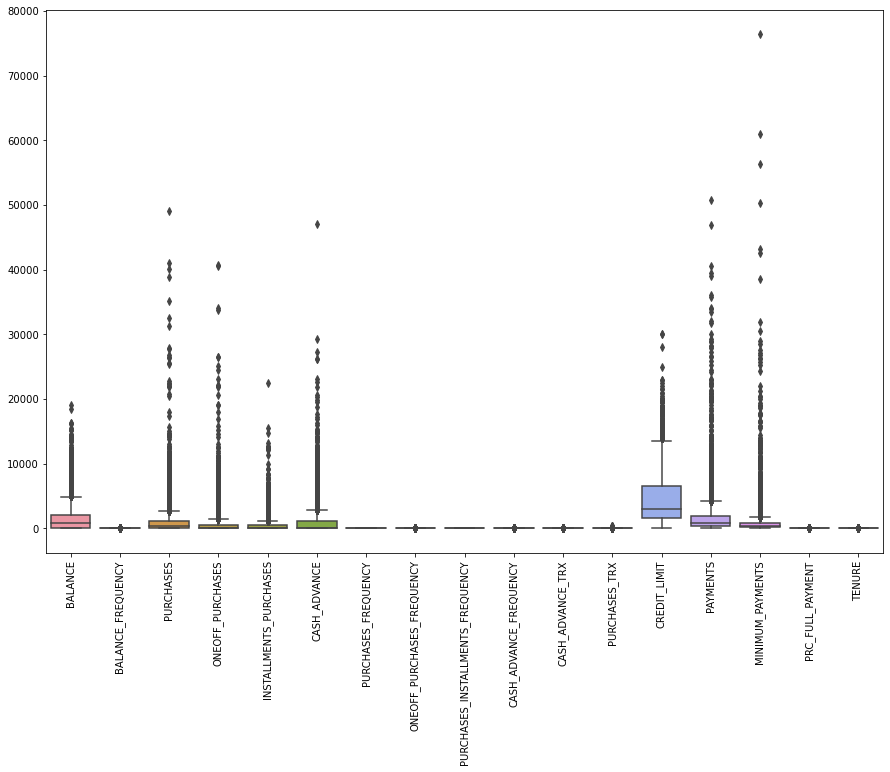

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data[features])
plt.xticks(rotation=90)

C:\Users\rromy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rromy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rromy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rromy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rromy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rromy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

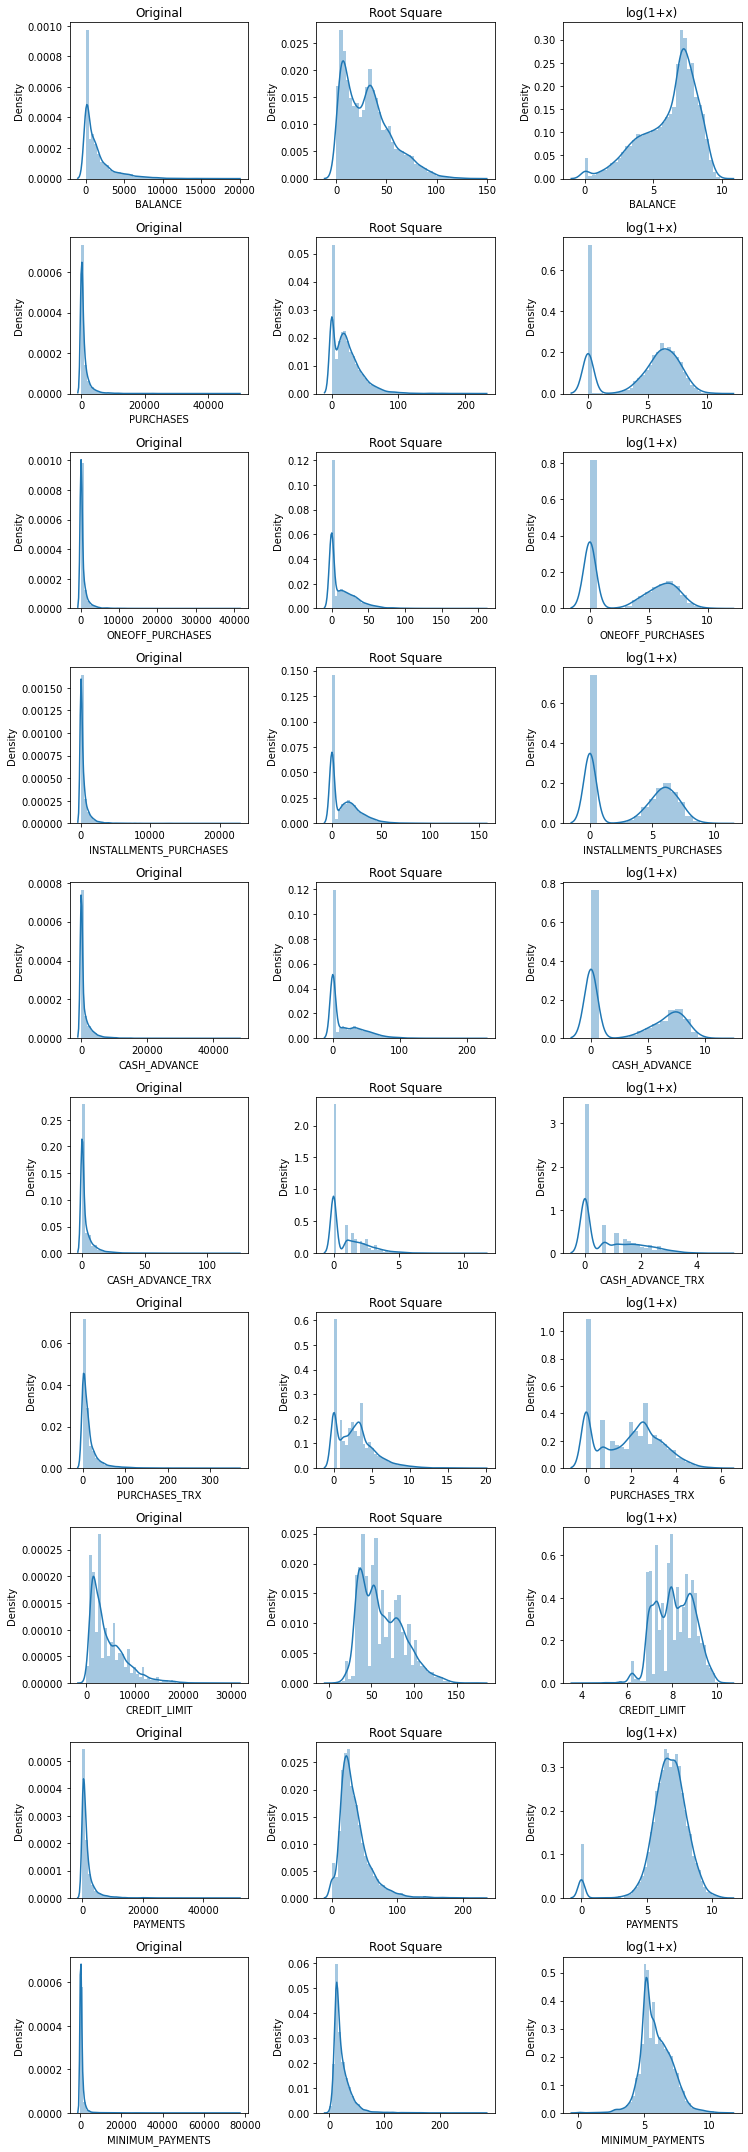

In [19]:
nr_rows = len(features_outliers)
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r, col in enumerate(features_outliers):
    sns.distplot(data[col], ax = axs[r][0]).set_title('Original')
    sns.distplot(np.sqrt(data[col].tolist()), ax = axs[r][1]).set_title("Root Square")
    sns.distplot(np.log1p(data[col]), ax = axs[r][2]).set_title('log(1+x)')
plt.tight_layout()    
plt.show()  

In [20]:
int_cols = data[features].select_dtypes(include=['int64']).columns
int_cols

Index(['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE'], dtype='object')

In [21]:
for col in int_cols:
    print(data[col].value_counts().sort_values(ascending=False))
    print('-'*30)

0     4628
1      887
2      620
3      436
4      384
      ... 
56       1
39       1
47       1
63       1
71       1
Name: CASH_ADVANCE_TRX, Length: 65, dtype: int64
------------------------------
0      2044
1       667
12      570
2       379
6       352
       ... 
128       1
152       1
176       1
200       1
199       1
Name: PURCHASES_TRX, Length: 173, dtype: int64
------------------------------
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64
------------------------------


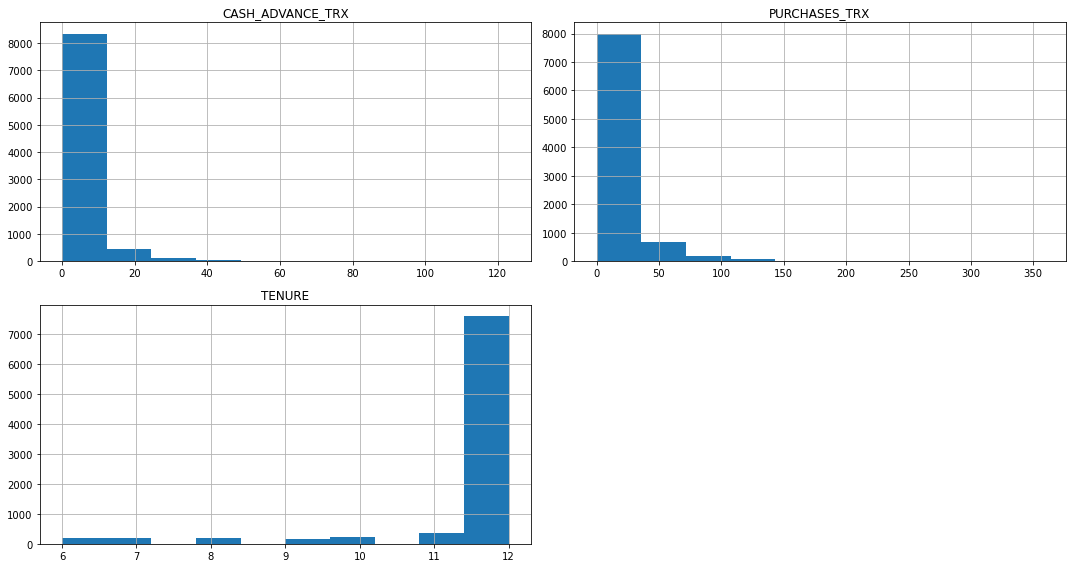

In [22]:
data[int_cols].hist(figsize=(15,8))
plt.tight_layout()

## Correlation Analysis

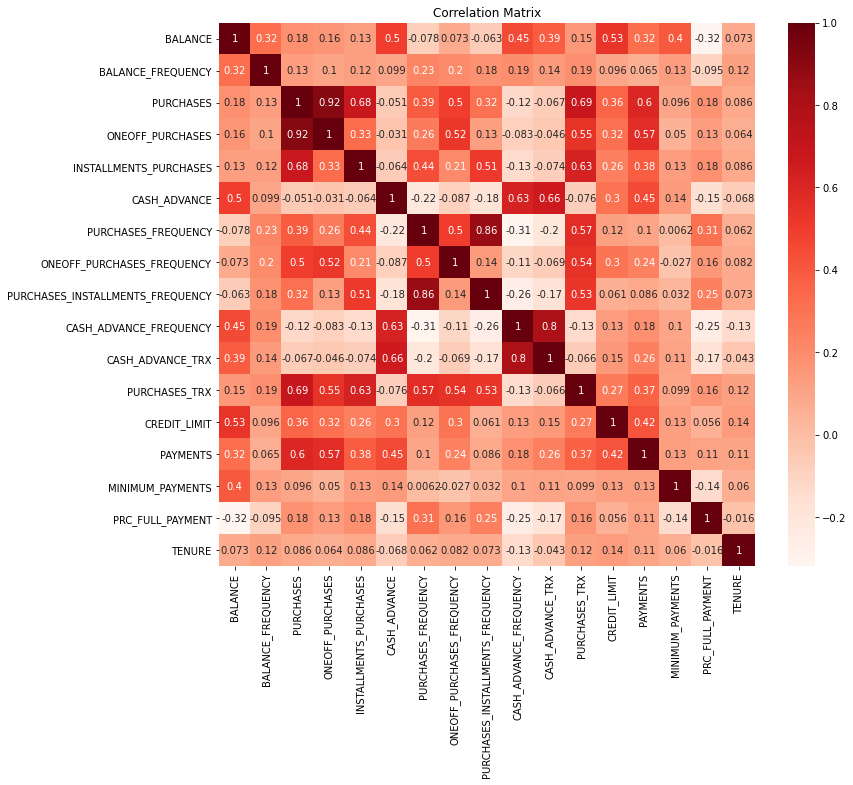

In [23]:
plt.figure(figsize=(12,10))
corr_m = data[features].corr()
sns.heatmap(corr_m, annot=True, cmap=plt.cm.Reds).set_title('Correlation Matrix')
plt.show()

## Preprocessing

In [24]:
features = data.columns[1:]
features_group1 = ['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS','CREDIT_LIMIT','MINIMUM_PAYMENTS']
features_group2 = list(set(features)-set(features_group1))

In [25]:
g1_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p)),
    #('scaler', MinMaxScaler(feature_range=(0, 1)))
    ('scaler', StandardScaler())
    ])

# using median in columns without outliers 
g2_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('group1', g1_transformer, features_group1),
        ('group2', g2_transformer, features_group2),
        ])

In [26]:
preprocessor.fit(data) 
np_data = preprocessor.transform(data) 
print(np_data[np.isnan(np_data)])
df_data = pd.DataFrame(np_data, columns=features_group1+features_group2)
print(df_data.isna().sum())
print(df_data.shape)
df_data.head(6)

[]
BALANCE                             0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
CREDIT_LIMIT                        0
MINIMUM_PAYMENTS                    0
PURCHASES_FREQUENCY                 0
TENURE                              0
CASH_ADVANCE_FREQUENCY              0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
PRC_FULL_PAYMENT                    0
PURCHASES                           0
dtype: int64
(8950, 17)


,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,CREDIT_LIMIT,MINIMUM_PAYMENTS,PURCHASES_FREQUENCY,TENURE,CASH_ADVANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,BALANCE_FREQUENCY,PRC_FULL_PAYMENT,PURCHASES
0,-1.205218,-0.987090,0.394480,-0.930733,-0.810069,-0.579510,-0.824484,-1.447163,-0.829841,-0.806490,0.36068,-0.675349,-0.678661,-0.707313,-0.249434,-0.525551,-0.424900
1,0.948918,-0.987090,-1.087454,1.528788,0.784603,-1.379210,1.065033,0.926060,0.908184,-1.221758,0.36068,0.573963,-0.678661,-0.916995,0.134325,0.234227,-0.469552
2,0.824993,1.062022,-1.087454,-0.930733,-0.810069,0.487865,-0.119300,1.010229,0.450407,1.269843,0.36068,-0.675349,2.673451,-0.916995,0.518084,-0.525551,-0.107668
3,0.624653,1.265778,-1.087454,0.564372,-0.123281,-0.874655,-4.161996,1.010229,-0.144271,-1.014125,0.36068,-0.258913,-0.399319,-0.916995,-1.016953,-0.525551,0.232058
4,0.271260,-0.114307,-1.087454,-0.930733,-0.810069,-0.874655,-0.064979,-1.224909,-0.351833,-1.014125,0.36068,-0.675349,-0.399319,-0.916995,0.518084,-0.525551,-0.462063
5,0.665562,-0.987090,1.246835,-0.930733,-0.810069,0.220191,0.389805,-0.730527,1.598968,0.439310,0.36068,-0.675349,-0.678661,0.550784,0.518084,-0.525551,0.154492


In [27]:
df_data.describe()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,CREDIT_LIMIT,MINIMUM_PAYMENTS,PURCHASES_FREQUENCY,TENURE,CASH_ADVANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,BALANCE_FREQUENCY,PRC_FULL_PAYMENT,PURCHASES
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-5.844952e-17,1.040682e-14,-2.190179e-16,-6.788673e-16,1.113944e-17,-8.335232e-16,4.272188e-16,1.092412e-14,-1.878324e-16,-3.716084e-16,1.556446e-14,5.856519e-16,2.021052e-15,2.353921e-16,1.209548e-14,-2.199184e-15,-9.278518e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.060633e+00,-9.870896e-01,-1.087454e+00,-9.307329e-01,-8.100687e-01,-1.379210e+00,-4.161996e+00,-5.079410e+00,-5.040840e+00,-1.221758e+00,-4.122768e+00,-6.753489e-01,-6.786608e-01,-9.169952e-01,-3.703271e+00,-5.255510e-01,-4.695519e-01
25%,-6.455634e-01,-9.870896e-01,-1.087454e+00,-9.307329e-01,-8.100687e-01,-8.746552e-01,-4.229376e-01,-8.741531e-01,-6.576937e-01,-1.014125e+00,3.606795e-01,-6.753489e-01,-6.786608e-01,-9.169952e-01,4.904486e-02,-5.255510e-01,-4.510006e-01
50%,3.039373e-01,1.414854e-01,3.721960e-01,-9.307329e-01,-8.100687e-01,1.344545e-01,8.164312e-02,-1.075230e-01,-1.442709e-01,2.404259e-02,3.606795e-01,-6.753489e-01,-3.993193e-01,-4.976286e-01,5.180838e-01,-5.255510e-01,-3.004541e-01
75%,7.284269e-01,9.722184e-01,9.081215e-01,1.036809e+00,7.846025e-01,7.247459e-01,5.818980e-01,8.356521e-01,6.458797e-01,1.062211e+00,3.606795e-01,4.351492e-01,3.269728e-01,9.701506e-01,5.180838e-01,-3.712234e-02,5.004652e-02
max,1.834341e+00,2.283062e+00,2.163264e+00,2.086805e+00,3.965987e+00,2.903371e+00,2.644753e+00,2.701570e+00,4.554165e+00,1.269843e+00,3.606795e-01,6.820521e+00,2.673451e+00,1.599199e+00,5.180838e-01,2.893453e+00,2.248351e+01


## Checking Outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'ONEOFF_PURCHASES'),
  Text(2, 0, 'INSTALLMENTS_PURCHASES'),
  Text(3, 0, 'CASH_ADVANCE'),
  Text(4, 0, 'CASH_ADVANCE_TRX'),
  Text(5, 0, 'PURCHASES_TRX'),
  Text(6, 0, 'PAYMENTS'),
  Text(7, 0, 'CREDIT_LIMIT'),
  Text(8, 0, 'MINIMUM_PAYMENTS'),
  Text(9, 0, 'PURCHASES_FREQUENCY'),
  Text(10, 0, 'TENURE'),
  Text(11, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(12, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(13, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(14, 0, 'BALANCE_FREQUENCY'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'PURCHASES')])

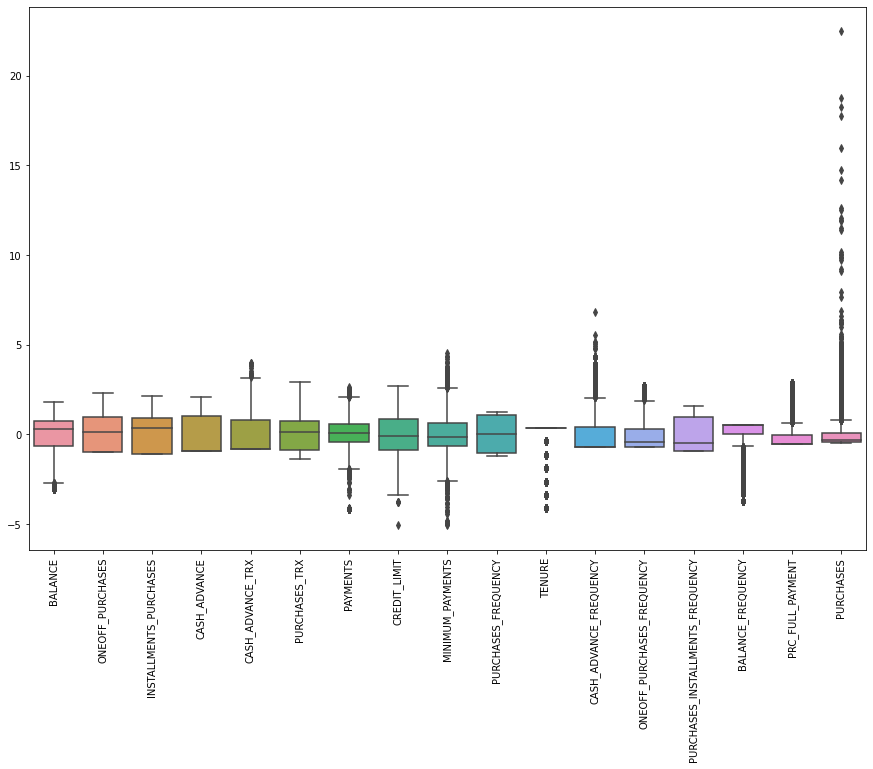

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_data)
plt.xticks(rotation=90)

# PCA

In [29]:
pca = PCA(n_components=2)
pca.fit(np_data)

PCA(n_components=2)

Text(0, 0.5, 'Second Principal Component')

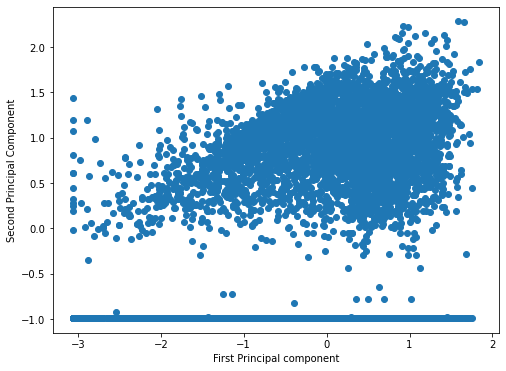

In [30]:
data_pca = pca.transform(np_data)
plt.figure(figsize=(8,6))
plt.scatter(np_data[:,0],np_data[:,1])
plt.xlabel('First Principal component')
plt.ylabel('Second Principal Component')

In [31]:
print(pca.noise_variance_)
print(pca.explained_variance_ratio_)

0.5267483194439802
[0.30980196 0.22547204]


## KMeans Models

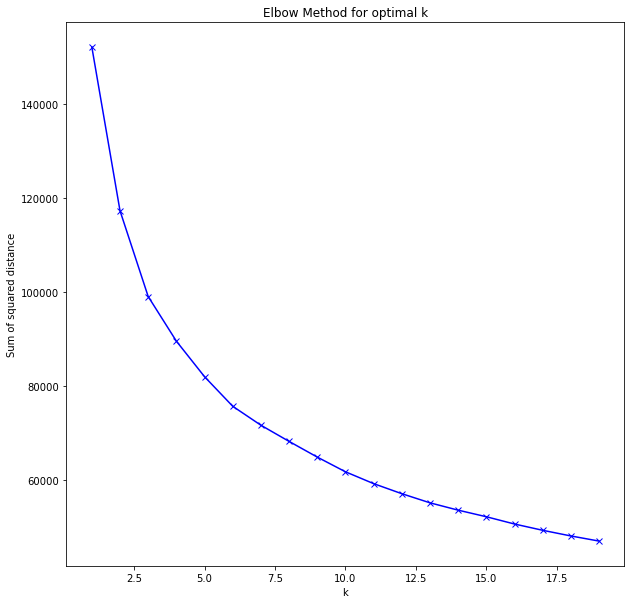

In [32]:
Sum_of_squared_distance = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=400, n_init=80, random_state=42).fit(np_data)
    Sum_of_squared_distance.append(km.inertia_)
    
plt.figure(figsize=(10, 10))
plt.plot(K, Sum_of_squared_distance,'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for optimal k')
plt.show()

## Silhouette scores

For n_clusters = 2 The average silhouette_score is : 0.22805878724076203
For n_clusters = 3 The average silhouette_score is : 0.21831959717920446
For n_clusters = 4 The average silhouette_score is : 0.2136120584785044
For n_clusters = 5 The average silhouette_score is : 0.2153681667282567
For n_clusters = 6 The average silhouette_score is : 0.21020794708150312
For n_clusters = 7 The average silhouette_score is : 0.214153421710842
For n_clusters = 8 The average silhouette_score is : 0.20449199192431766
For n_clusters = 9 The average silhouette_score is : 0.1735750900809957
For n_clusters = 10 The average silhouette_score is : 0.17649156713533168
For n_clusters = 11 The average silhouette_score is : 0.1771375311898093
For n_clusters = 12 The average silhouette_score is : 0.18268303237274408
For n_clusters = 13 The average silhouette_score is : 0.18681537145370836
For n_clusters = 14 The average silhouette_score is : 0.18771375909392227
For n_clusters = 15 The average silhouette_score is 

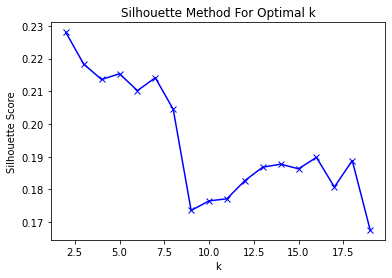

In [33]:
silhouette_scores = [] 
K = range(2, 20)

for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=45).fit_predict(np_data)
    scr = silhouette_score(np_data, km)
    silhouette_scores.append(scr)
    print("For n_clusters =", k, "The average silhouette_score is :", scr)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

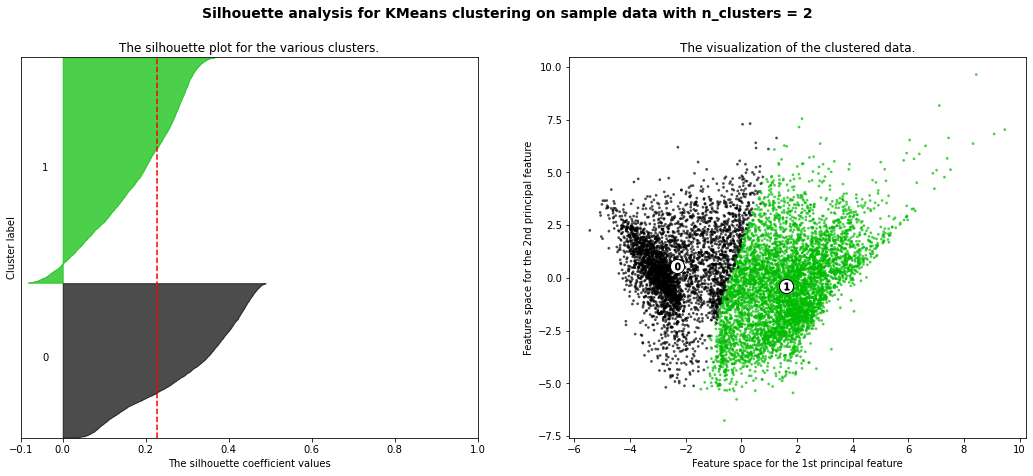

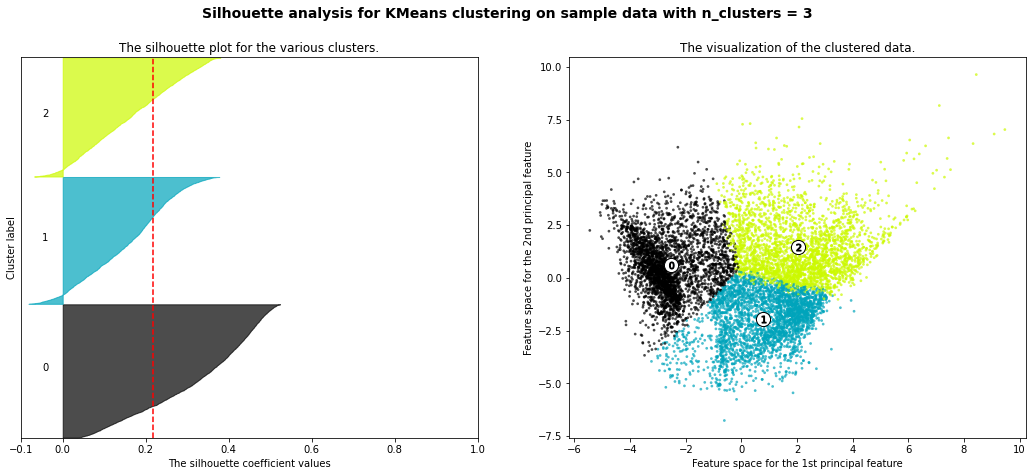

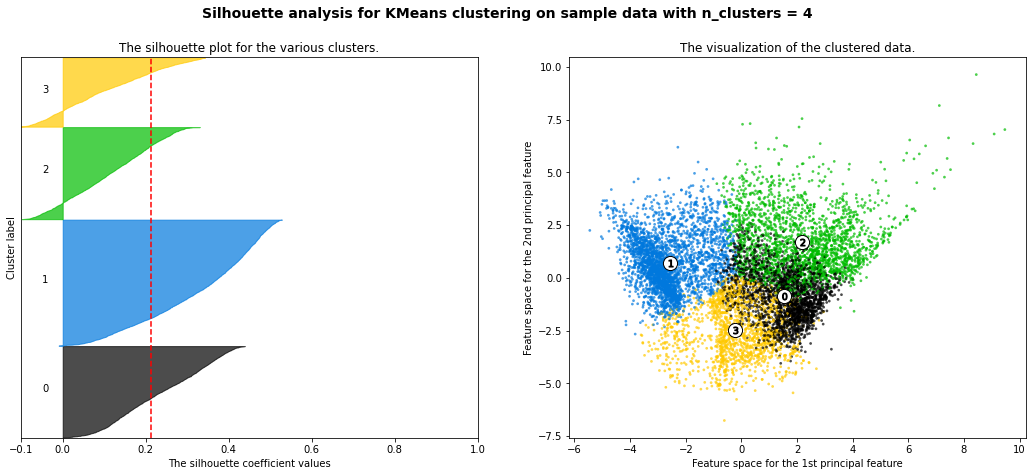

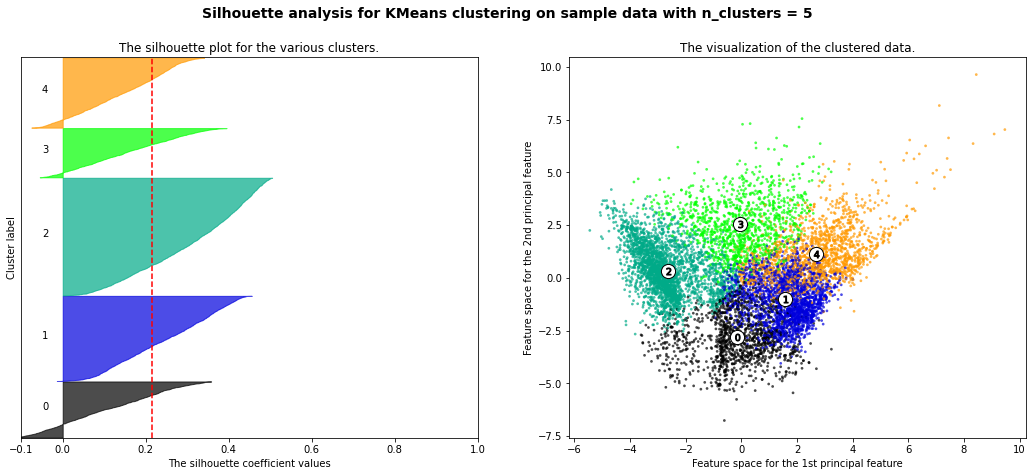

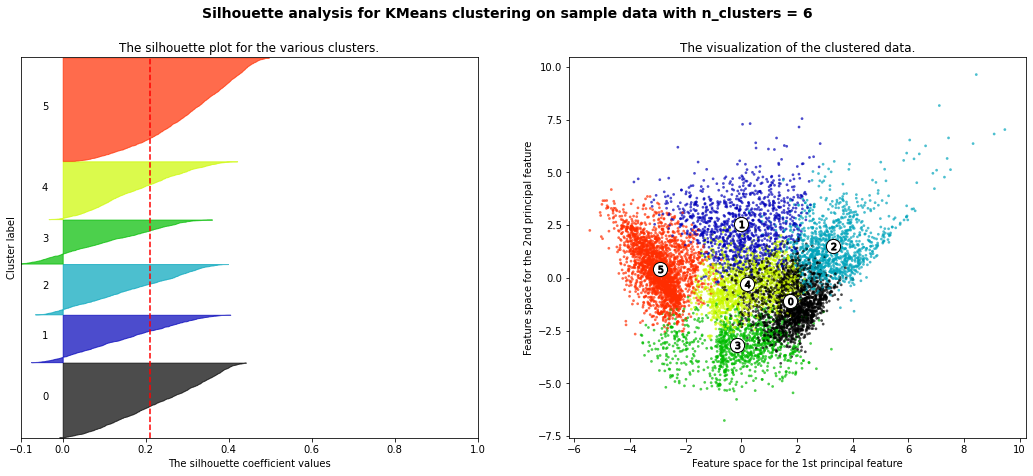

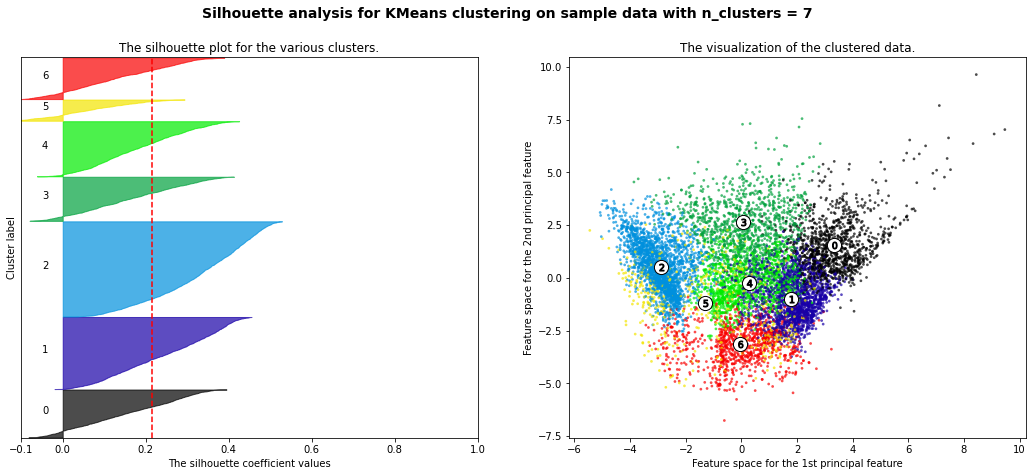

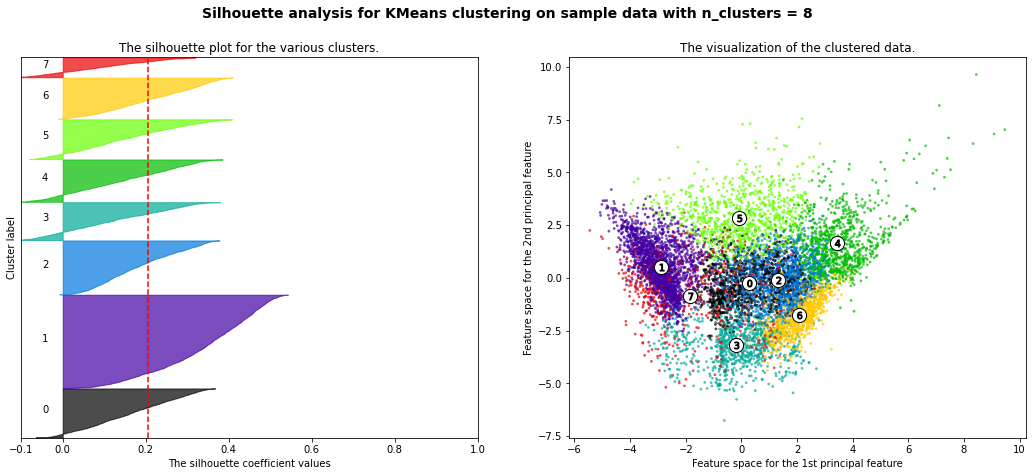

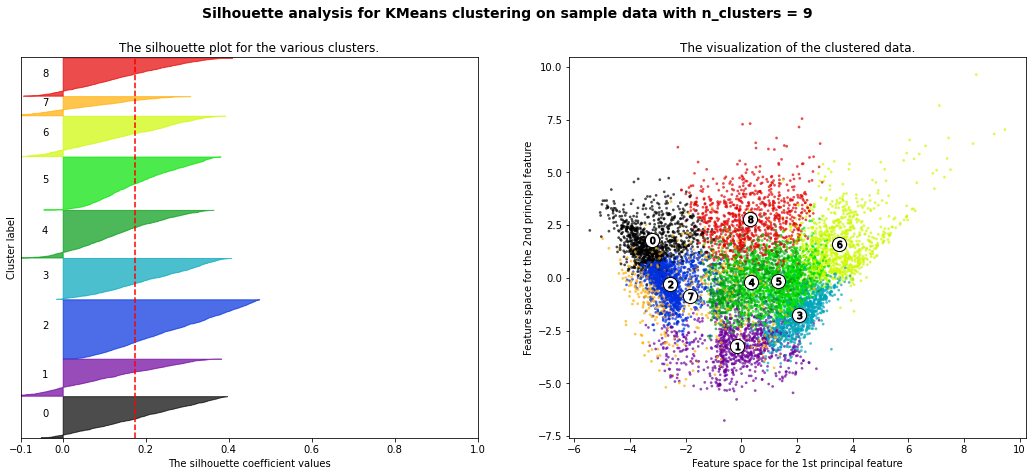

In [34]:
K = range(2,10)

for k in K:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np_data) + (k + 1) * 10])

    clusterer = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=45)
    cluster_labels = clusterer.fit_predict(np_data)

    silhouette_avg = silhouette_score(np_data, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(np_data, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    pca = PCA(n_components=2)
    pca.fit(np_data)
    X = pca.transform(np_data)

    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    pca_centers = pca.transform(clusterer.cluster_centers_)
    # Draw white circles at cluster centers
    ax2.scatter(pca_centers[:, 0], pca_centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(pca_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st principal feature")
    ax2.set_ylabel("Feature space for the 2nd principal feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

In [35]:
km = KMeans(n_clusters=6, 
            init='k-means++',
            max_iter=400, 
            n_init=80, 
            random_state=0)

km_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('km', km)])

km_pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('group1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['BALANCE',
                                                   'ONEOFF_PURCHASES',
                                                   'INSTALLMENTS_PURCHASES',
                                                   'CASH_ADVANCE',
                                                   'CASH_ADVANCE_TRX',
                             

In [36]:
labels = km.labels_

In [37]:
clusters = pd.concat([data, pd.DataFrame({'CLUSTER':labels})], axis=1)
clusters.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,5
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


In [38]:
clusters.CLUSTER.value_counts()

2    2445
4    1771
5    1373
0    1192
1    1125
3    1044
Name: CLUSTER, dtype: int64

In [39]:
clusters.drop(columns=['CUST_ID'],inplace=True)

In [40]:
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


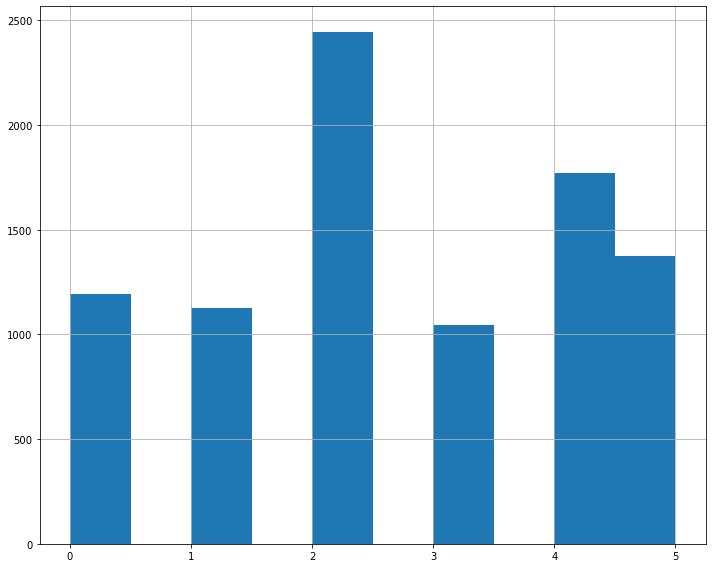

In [41]:
clusters.CLUSTER.hist(figsize=(10, 8))
plt.tight_layout()

Cluster 0 = Rich People
Cluster 1 = Low level income
Cluster 2 = Average People
Cluster 3 = Debtors
Cluster 4 = Hustle People
Cluster 5 = Bourgeois

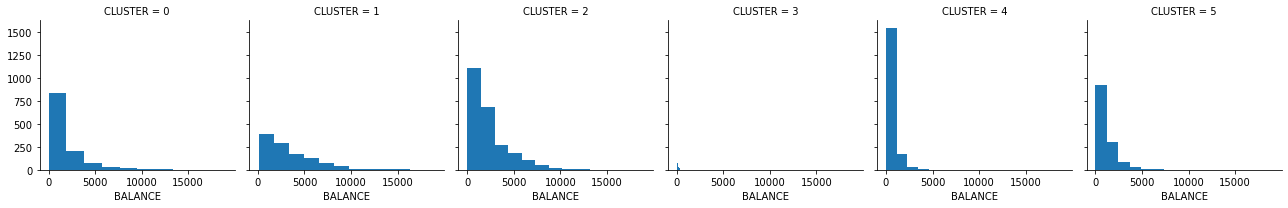

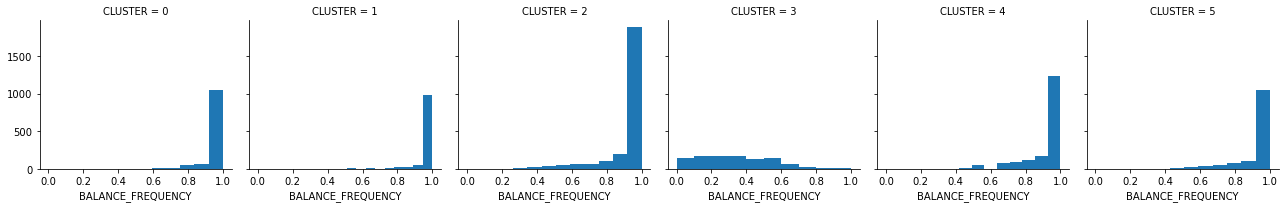

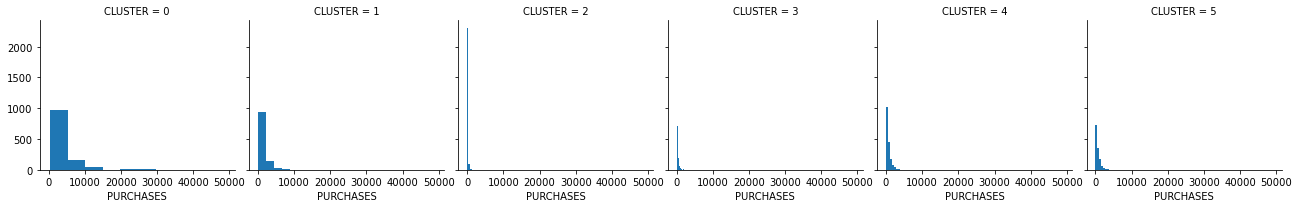

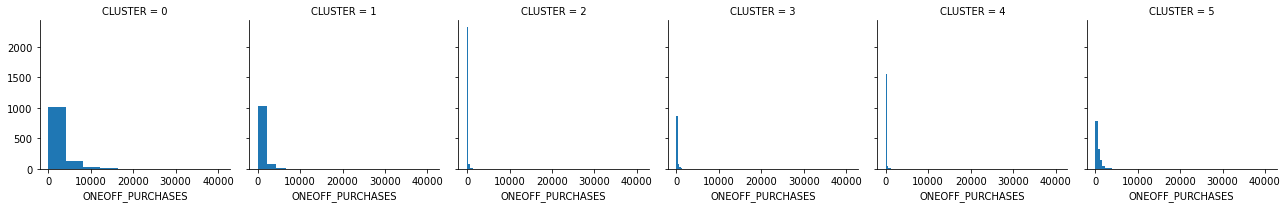

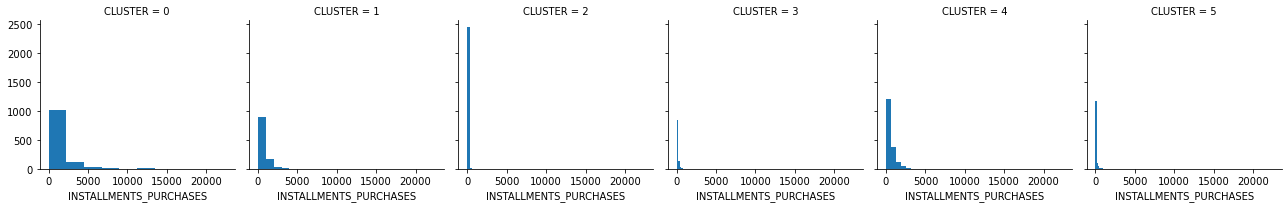

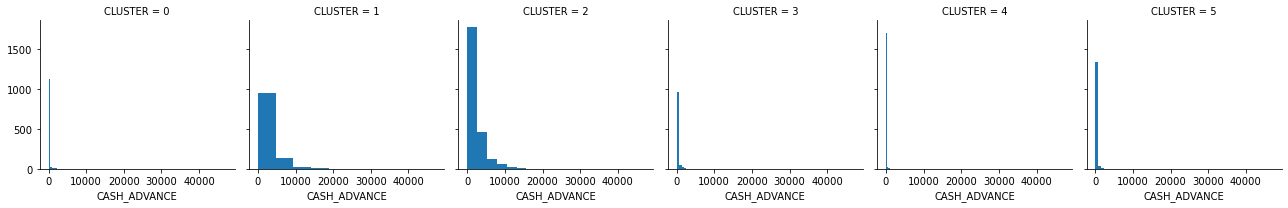

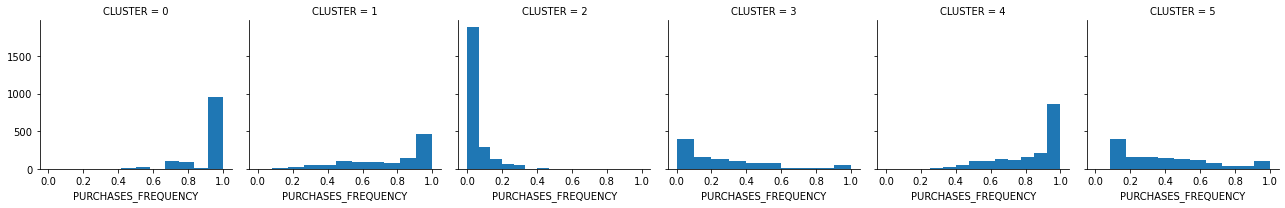

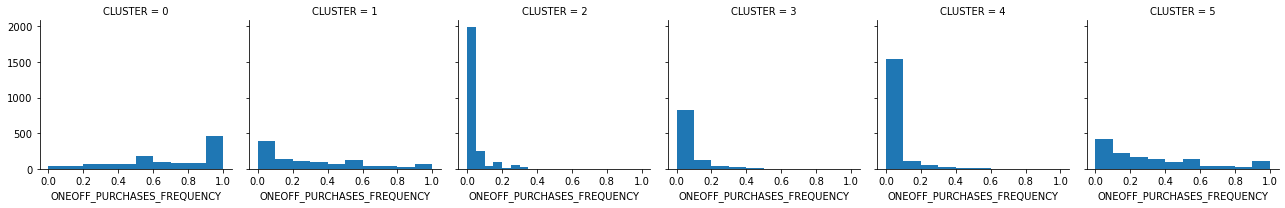

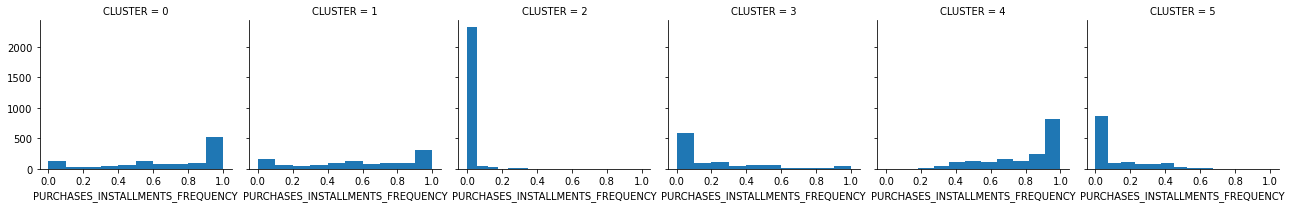

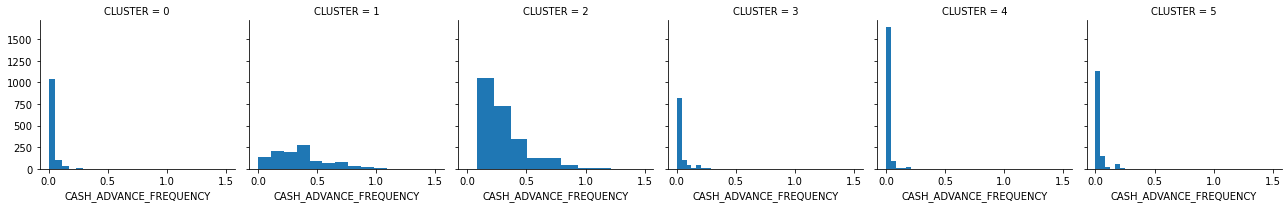

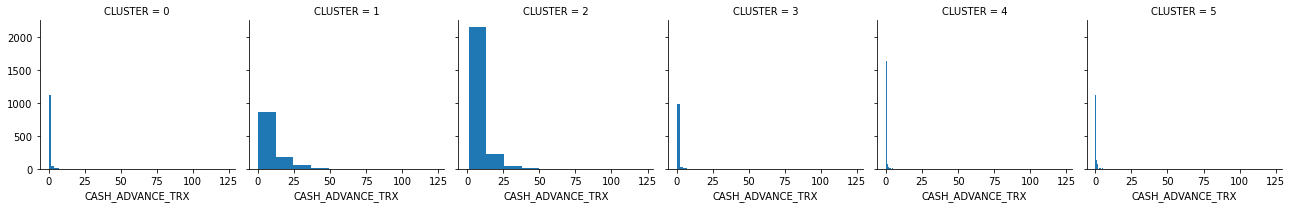

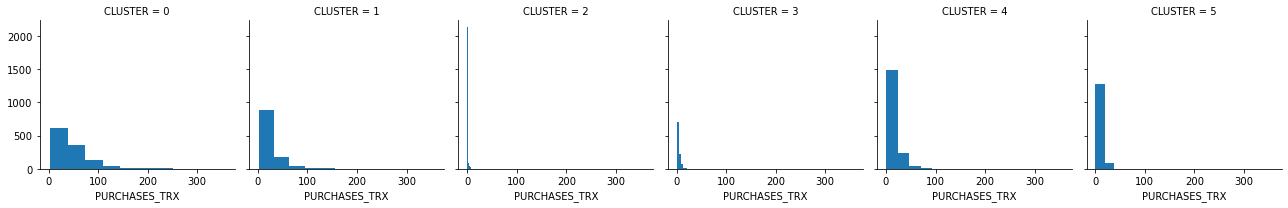

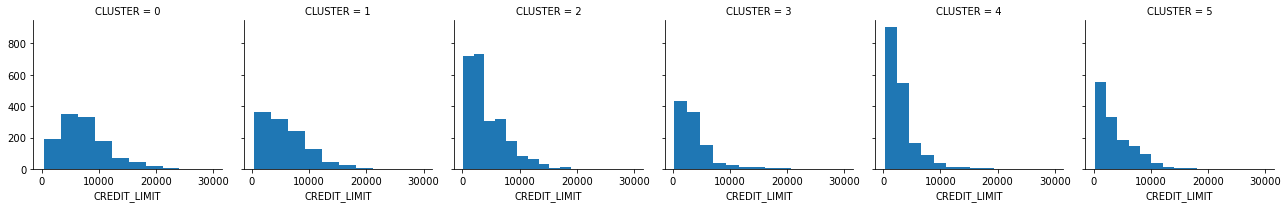

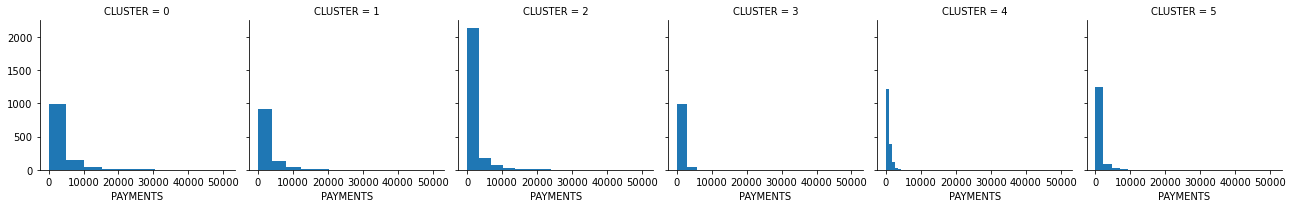

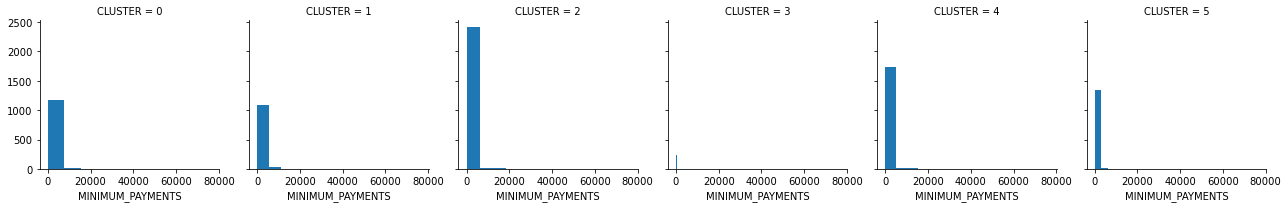

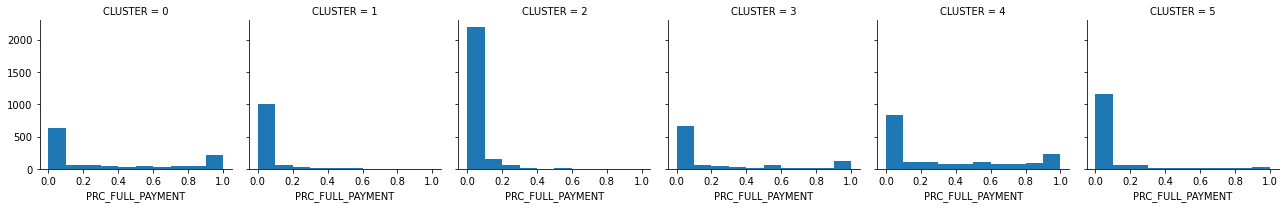

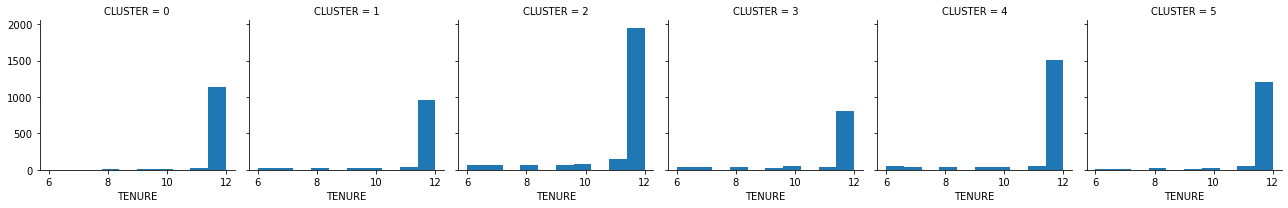

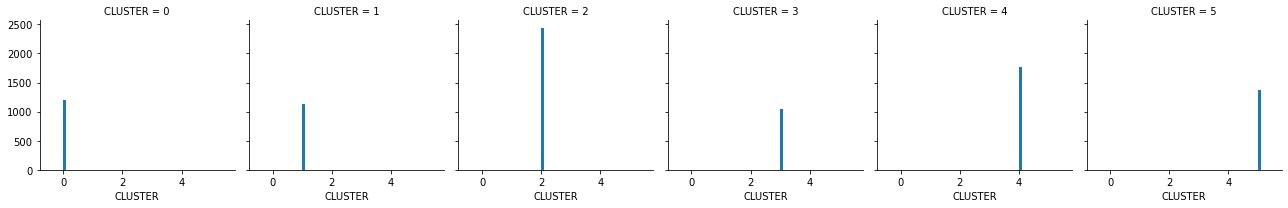

In [42]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='CLUSTER')
    grid.map(plt.hist, c)

In [43]:
dist = 1 - cosine_similarity(np_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

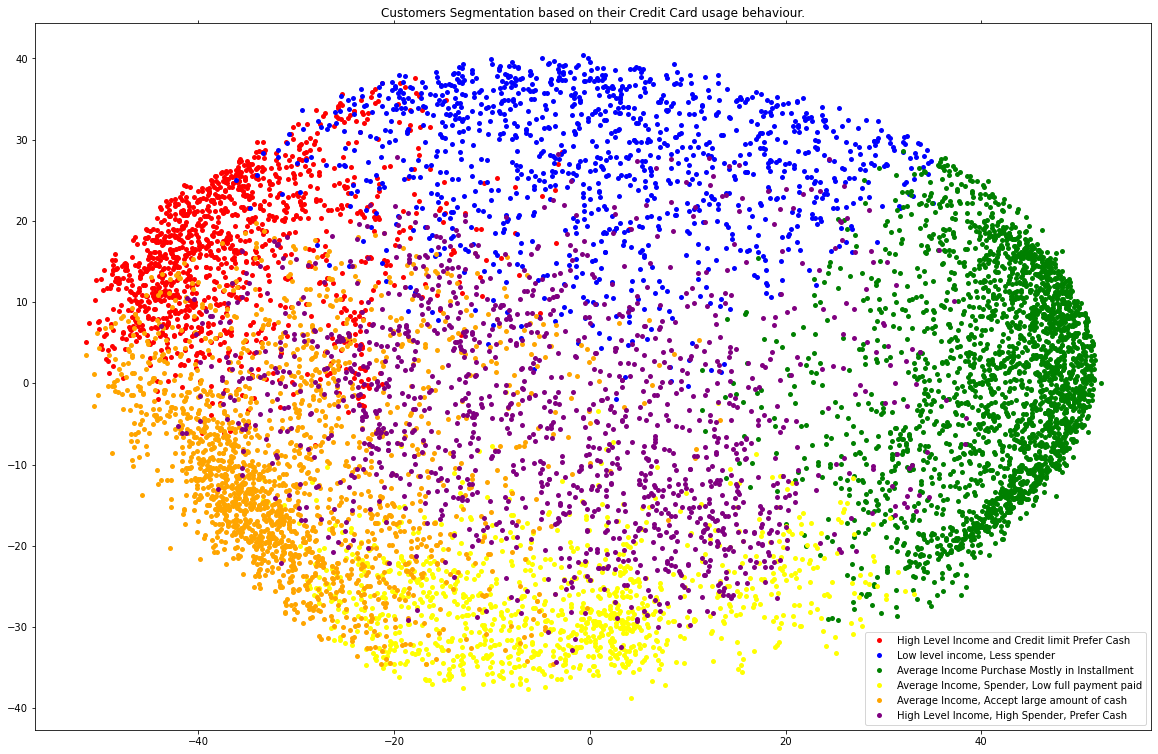

In [44]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'High Level Income and Credit limit Prefer Cash', 
         1: 'Low level income, Less spender', 
         2: 'Average Income Purchase Mostly in Installment', 
         3: 'Average Income, Spender, Low full payment paid', 
         4: 'Average Income, Accept large amount of cash',
         5: 'High Level Income, High Spender, Prefer Cash'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()


## Splitting the data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clusters.drop(('CLUSTER'),axis=1),clusters['CLUSTER'], test_size=0.3, random_state=42)

In [46]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5831,649.896506,1.000000,4919.76,4353.06,566.70,191.376535,0.916667,0.666667,0.833333,0.166667,3,48,6500.0,4854.340510,219.441278,0.166667,12
2244,2382.328208,1.000000,899.58,413.28,486.30,450.252732,1.000000,0.250000,1.000000,0.166667,4,34,2500.0,850.186851,1212.047288,0.000000,12
4205,1119.157048,1.000000,133.90,133.90,0.00,269.234406,0.166667,0.166667,0.000000,0.250000,3,3,1200.0,427.355150,320.855529,0.000000,12
7933,0.000000,0.000000,136.80,0.00,136.80,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2700.0,127.996550,312.343947,0.000000,12
8462,20.620429,0.818182,169.66,0.00,169.66,0.000000,0.750000,0.000000,0.666667,0.000000,0,9,1000.0,192.185764,145.811693,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1079.097023,1.000000,247.44,0.00,247.44,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,503.445403,302.481716,0.000000,12
5191,833.541256,1.000000,0.00,0.00,0.00,1422.637361,0.000000,0.000000,0.000000,0.333333,8,0,2500.0,180.104404,282.085369,0.000000,12
5390,40.247238,0.181818,0.00,0.00,0.00,909.480894,0.000000,0.000000,0.000000,0.083333,2,0,1500.0,3578.648701,69.271137,1.000000,12
860,0.000000,0.000000,199.88,0.00,199.88,0.000000,0.750000,0.000000,0.750000,0.000000,0,14,4000.0,0.000000,312.343947,0.000000,12


## K-Means

In [47]:
kmeans = KMeans(n_clusters=6, init='k-means++')
model_kmeans = kmeans.fit(clusters)
label = kmeans.predict(clusters)
SScore = silhouette_score(clusters, label)
print('Silhouette Score: ',SScore)

Silhouette Score:  0.372547772661822


## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[272   8   0   8  26  29]
 [ 20 271  36   0  18  13]
 [  0  37 668  12   0   2]
 [ 13   2  17 178  66  35]
 [ 45  31   0  25 417   7]
 [ 85  33  32  23  14 242]]
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       343
           1       0.71      0.76      0.73       358
           2       0.89      0.93      0.91       719
           3       0.72      0.57      0.64       311
           4       0.77      0.79      0.78       525
           5       0.74      0.56      0.64       429

    accuracy                           0.76      2685
   macro avg       0.74      0.73      0.73      2685
weighted avg       0.76      0.76      0.76      2685

0.762756052141527


C:\Users\rromy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
import pickle
pickle.dump(lr, open('model_LogREG.pkl','wb'))

In [50]:
import pickle
pickle.dump(model_kmeans, open('model_kmeans.pkl','wb'))